In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_results_regression(df, metric="mae_test"):

    df["gaussian"] = pd.to_numeric(df["gaussian"], errors="coerce")

    cov_types = df["covariance"].unique()
    for cov in cov_types:
        df_cov = df[df["covariance"] == cov]

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=df_cov,
            x="gaussian",
            y=metric,
            hue="model_name",
            palette="tab10"
        )

        plt.title(f"{metric} por número de gaussianas - Covariance: {cov}")
        plt.xlabel("Número de gaussianas")
        plt.ylabel(metric)
        plt.legend(title="Modelo")
        plt.grid(axis="y", linestyle="--", alpha=0.5)

        plt.tight_layout()
        plt.show()
def plot_results_classification(df, metric="acc_test", n_classes = 2):
    # Asegurar que gaussians sea numérico
    df["gaussian"] = pd.to_numeric(df["gaussian"], errors="coerce")

    cov_types = df["covariance"].unique()

    for cov in cov_types:
        df_cov = df[df["covariance"] == cov]

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=df_cov,
            x="gaussian",
            y=metric,
            hue="model_name",
            palette="tab10"
        )

        plt.title(f"{metric} according to the number of Gaussians - Covariance: {cov} - Classes {n_classes}")
        plt.xlabel("Number of Gaussians")
        plt.ylabel(metric)
        plt.legend(title="Model")
        plt.grid(axis="y", linestyle="--", alpha=0.5)

        plt.show()


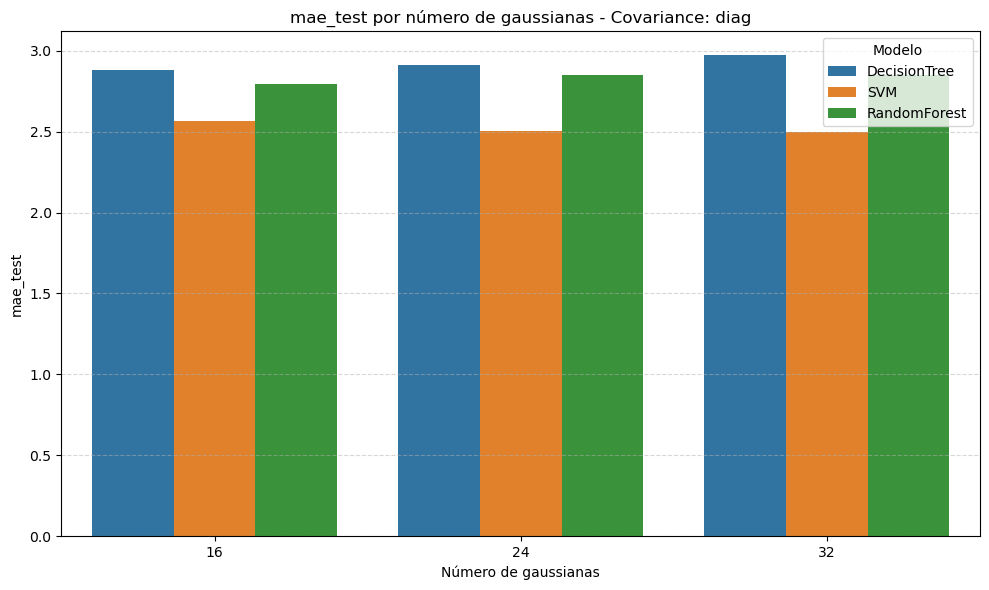

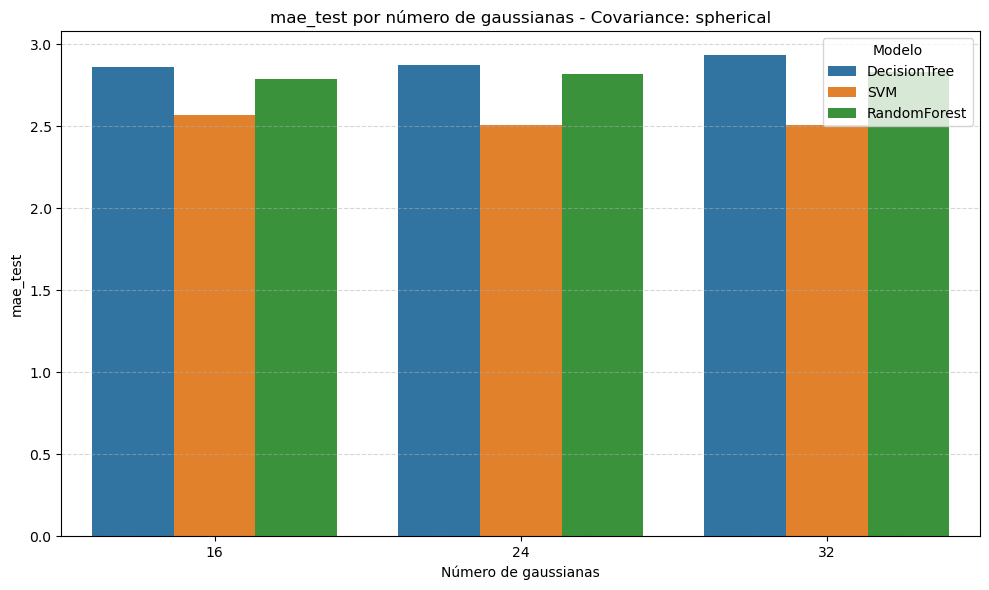

In [8]:
PATH = "/home/administrador/Documents/Santiago/results/results/run_11_09_2130/0_0/reg_results_wo.csv"
# === 1. Cargar CSV ===
df = pd.read_csv(PATH)
plot_results_regression(df, "mae_test")

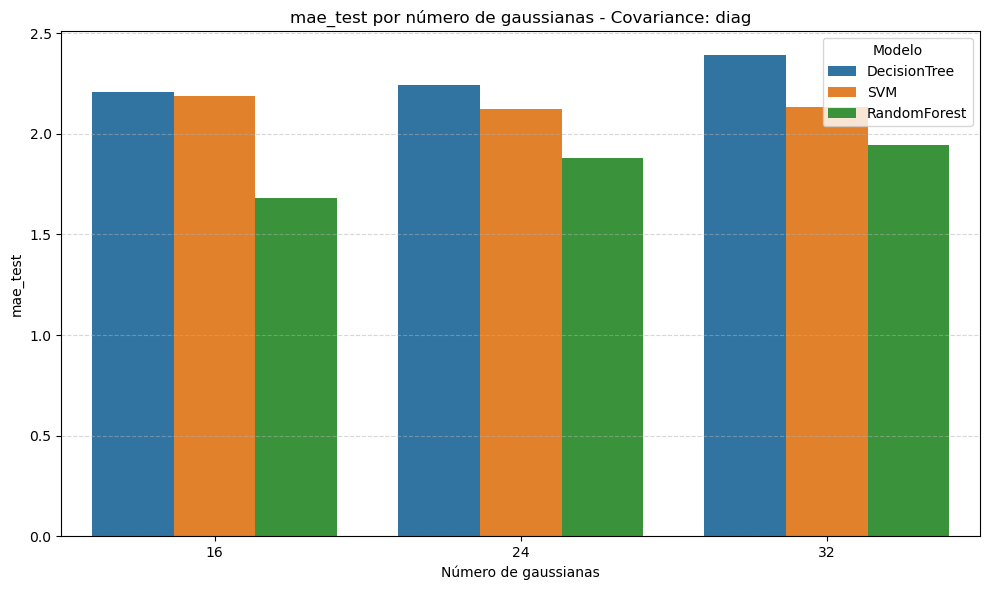

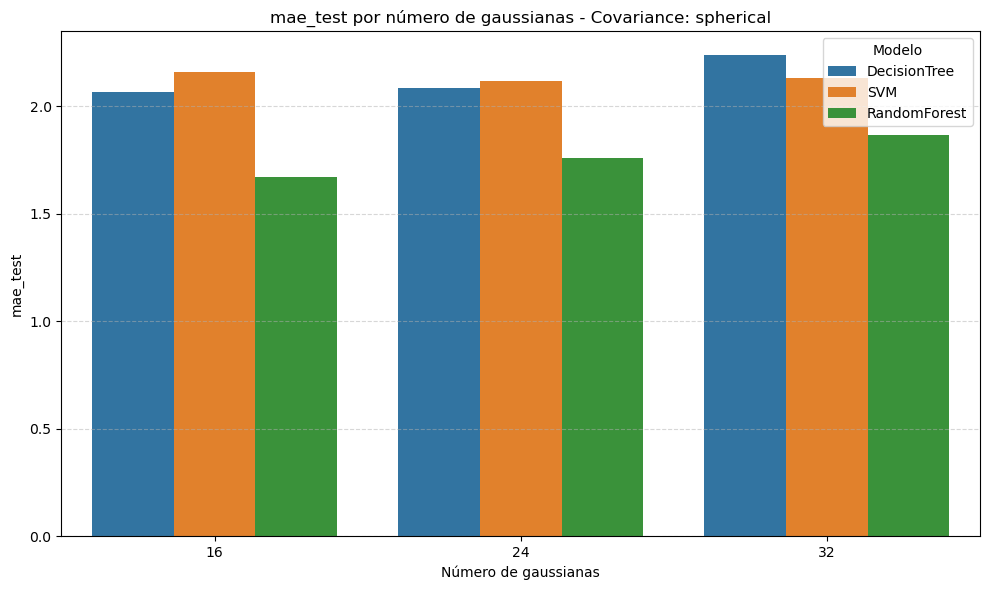

In [9]:
PATH = "/home/administrador/Documents/Santiago/results/results/run_11_09_2130/0_0/reg_results_w.csv"
# === 1. Cargar CSV ===
df = pd.read_csv(PATH)
plot_results_regression(df, "mae_test")

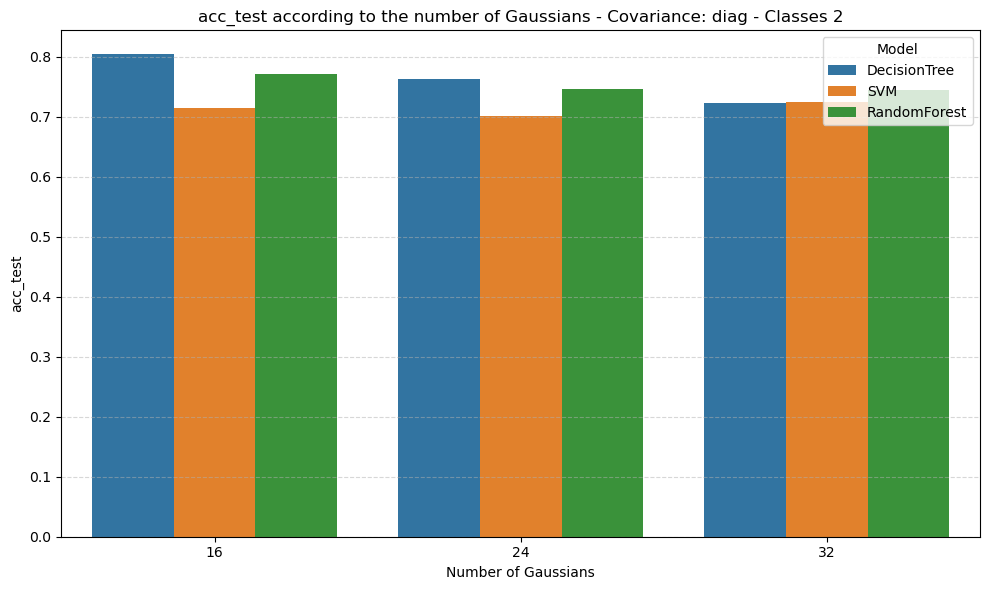

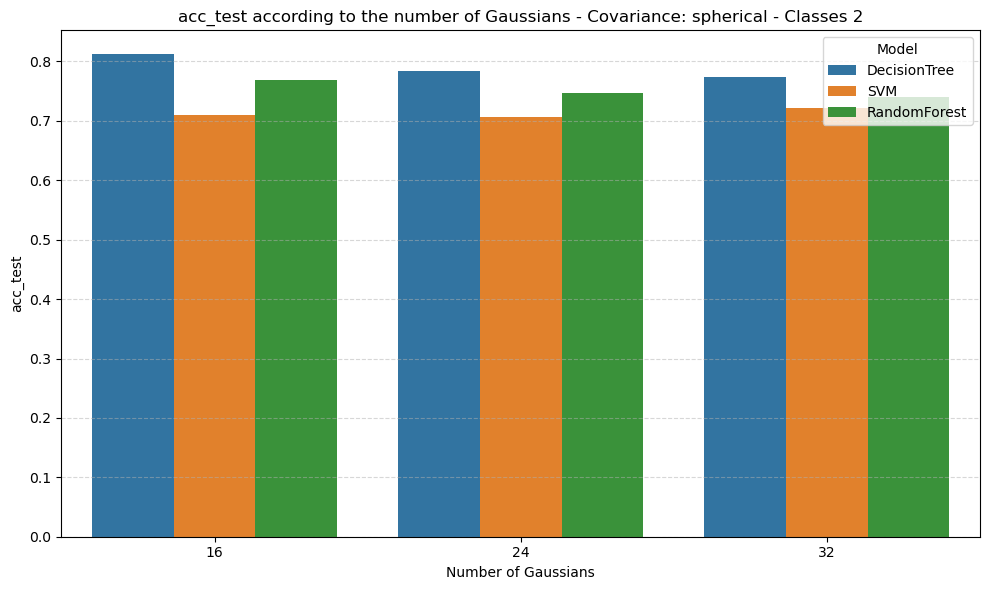

In [11]:
PATH = "/home/administrador/Documents/Santiago/results/results_classification/0_0/run_11_09_2129/class_results_w_2classes.csv"
# === 1. Cargar CSV ===
df = pd.read_csv(PATH)
plot_results_classification(df, "acc_test")